In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
dataframe = pd.read_csv("data.csv")
print(dataframe)

     Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk
0             0           962560        5.0        3.0
1             1           905220        2.0        4.5
2             2           882698        2.0        3.5
3             3           856084        3.5        2.5
4             4           909337        4.0        5.0
..          ...              ...        ...        ...
493         493           909272        5.0        3.5
494         494           860148        4.0        2.0
495         495           919541        2.0        4.0
496         496           915447        4.5        4.0
497         497           905212        4.0        5.0

[498 rows x 4 columns]


In [52]:
lecture_grades = dataframe["ocena_wyk"]
lab_grades = dataframe["ocena_lab"]


end_grades = np.array([round((0.6 * lec + 0.4 * lab) * 2) / 2 for lec, lab in zip(lecture_grades, lab_grades)])
end_grades = np.array([grade if grade > 2 else 2 for grade in end_grades])

mean = end_grades.mean()
print(end_grades)

[4.  3.5 3.  3.  4.5 3.5 3.  3.  3.  3.5 3.  3.  4.5 4.  3.5 5.  4.5 2.5
 3.5 4.5 4.  4.  3.5 4.  4.5 3.5 2.  3.5 2.5 4.  3.5 4.5 3.  4.  2.  4.
 4.  5.  3.5 2.5 3.  3.5 4.  3.  4.5 3.  4.5 3.5 3.  4.  4.5 2.5 4.  3.
 4.5 3.  3.5 2.5 3.5 3.  4.  3.5 3.  4.  4.  4.  4.5 3.5 2.5 3.  5.  3.
 4.  3.  3.  4.  3.  3.  3.  2.5 4.  2.5 5.  4.5 2.5 2.5 4.  2.5 4.  4.5
 4.  3.5 4.  2.5 4.  3.  4.5 3.5 5.  3.  3.  2.5 3.  3.5 3.5 4.  3.5 3.
 3.  4.5 4.  3.5 4.5 4.  4.  2.5 4.5 4.  4.  3.5 3.  3.5 3.  3.  2.5 3.5
 3.5 3.5 4.  3.5 5.  3.  3.  3.  2.5 4.  3.5 4.  4.5 4.  4.  4.  3.  3.
 3.  2.5 5.  3.5 4.5 3.5 4.5 3.  4.5 3.  3.5 2.  2.  3.  2.  3.  4.  2.5
 4.  3.5 3.5 2.5 4.  2.5 4.  2.5 3.  5.  2.5 3.5 3.5 2.5 2.  4.  5.  3.
 5.  3.  3.5 4.  4.5 4.5 5.  3.5 3.  3.5 4.  3.5 3.  4.  4.5 3.  4.  3.5
 3.  4.  2.  3.  3.  4.  4.  2.5 3.  3.  4.  3.  5.  2.5 3.5 3.  2.5 4.
 3.5 3.5 4.5 2.5 2.  3.  3.5 3.  3.  3.  4.  4.  3.5 3.5 4.  3.  4.  3.
 4.5 3.  3.5 3.5 3.  2.  2.5 3.5 3.5 4.  3.5 5.  2.5 4.  2.

In [53]:
grades = {2 + 0.5 * x : 0 for x in range(8)}

for grade in end_grades:
    grades[grade] += 1
print(grades)

{2.0: 20, 2.5: 67, 3.0: 123, 3.5: 102, 4.0: 114, 4.5: 49, 5.0: 23, 5.5: 0}


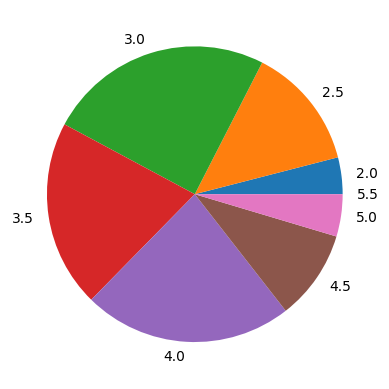

In [57]:
grades_list = [value for value in grades.values()]

plt.figure()
plt.pie(grades_list, labels=[str(g) for g in grades.keys()])
plt.show()

In [ ]:
passed_count = 0
for key, value in {key : value for key, value in grades.items() if key > 2}.items():
    passed_count += value
print(passed_count)

478


In [ ]:
failed_count = len(end_grades) -  passed_count
print(failed_count)

20


In [ ]:
data = {**{key: [value] for key, value in grades.items()}, "mean": [mean], "passed": [passed_count], "failed": [failed_count]}
df = pd.DataFrame(data)
df.to_csv("out.csv")